In [2]:
import statsmodels as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = "D:/DATA SCIENCE PANEL/My Projects/car_price_prediction/car_price_data.csv"
df = pd.read_csv(data,header=None)
print("Dataset Import Successful")

Dataset Import Successful


In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("Header Load Successful")

Header Load Successful


In [5]:
df.columns=headers

In [6]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [9]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].astype('float').mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke=df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.nan,avg_stroke,inplace=True)

avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [10]:
df["peak-rpm"].head()

0    5000
1    5000
2    5000
3    5500
4    5500
Name: peak-rpm, dtype: object

In [11]:
#df['num-of-doors'].value_counts()
df['num-of-doors'].value_counts().idxmax()

'four'

In [12]:
df["num-of-doors"].replace(np.nan,'four',inplace=True)

In [13]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [15]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [16]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [17]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [18]:
df.to_csv("D:/DATA SCIENCE PANEL/My Projects/car_price_prediction/cleaned_data.csv",index=False)

In [19]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df["city-L/100km"]=235/df["city-mpg"]
df.head(1) #for cities/countries where Litres are used

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476


In [20]:
df["highway-mpg"]=235/df["highway-mpg"]
df.rename(columns={"highway-mpg":"highway-L/100km"},inplace=True)
df.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476


In [21]:
# Normalizing the Columns of 'length', 'width' and 'height'

# Using Simple Feature Scaling Method
df["length"]=df["length"]/df["length"].max()
df["width"]=df["width"]/df["width"].max()
df["height"]=df["height"]/df["height"].max()

In [22]:
df["horsepower"].nunique()
df.dtypes # tells us it is currently 'object' so first we convert it into 'int'
df["horsepower"]=df["horsepower"].astype(int,copy=True)

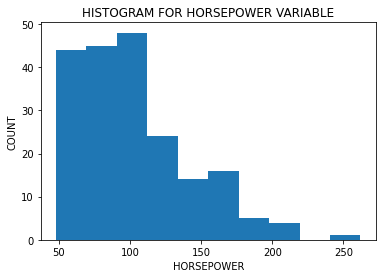

In [23]:
# Plotting a Histogram to check the distribution
plt.hist(df["horsepower"])
plt.xlabel("HORSEPOWER")
plt.ylabel("COUNT")
plt.title("HISTOGRAM FOR HORSEPOWER VARIABLE")
plt.show()

In [24]:
# Creating 3 Bins with Equal Width
bins = np.linspace(min(df["horsepower"]),max(df["horsepower"]),4)
bins


array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [25]:
names = ['low','medium','high']
df["horsepower-binned"] = pd.cut(df["horsepower"],bins,labels=names,include_lowest=True)
df[["horsepower","horsepower-binned"]].head()

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low


In [26]:
# No. of cars in each bin
df["horsepower-binned"].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

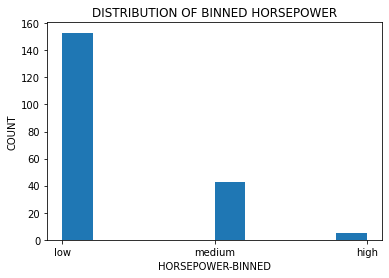

In [27]:
# Plotting the Distribution of Binned Horsepower
plt.hist(df["horsepower-binned"])
plt.xlabel("HORSEPOWER-BINNED")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF BINNED HORSEPOWER")
plt.show()

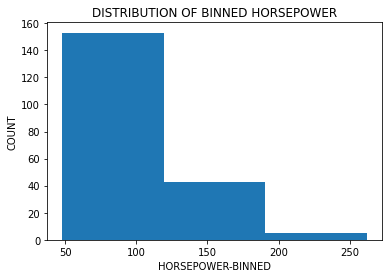

In [28]:
# We DID NOT need tto creatte bins like tthis. All we required is the final output/historgram/visualization showing us tthe bins, so here it is:
plt.hist(df["horsepower"],bins=3)
plt.xlabel("HORSEPOWER-BINNED")
plt.ylabel("COUNT")
plt.title("DISTRIBUTION OF BINNED HORSEPOWER")
plt.show()

In [29]:
# Changing Categorical Variables into Discrete Variables
dummy_variable_1 = pd.get_dummies(df["fuel-type"]) # Generates new columns within the Dataframe so concatenation/integration is important

dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
# Changing the Column Names for Clarity

dummy_variable_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)

dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
# Integrate
df=pd.concat([df,dummy_variable_1],axis=1)
df.drop("fuel-type",axis=1,inplace=True)

In [32]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'fuel-type-diesel',
       'fuel-type-gas'],
      dtype='object')

In [33]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [34]:
dummy_variable_2.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
df= pd.concat([df,dummy_variable_2],axis=1)
df.drop("aspiration",axis=1,inplace=True)
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-L/100km', 'price',
       'city-L/100km', 'horsepower-binned', 'fuel-type-diesel',
       'fuel-type-gas', 'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [36]:
df.to_csv('clean_and_binned.csv')

# Analyzing Individual Features (Columns) for Data Visualization (EDA)

In [37]:
# Datatype of "peak-rpm" column
df["peak-rpm"].dtype

dtype('float64')

In [42]:
# Find the correlation between the following columns: bore, stroke,compression-ratio , and horsepower
for_correlation = df[["bore", "stroke","compression-ratio", "horsepower"]]
for_correlation.corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


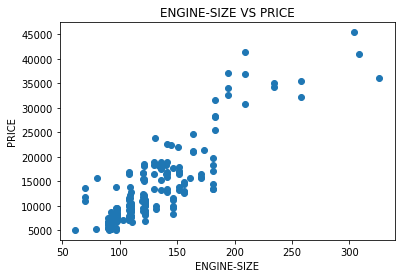

In [43]:
# Scatterplot of "engine-size" and "price"
x = df["engine-size"]
y = df["price"]
plt.scatter(x,y)
plt.title("ENGINE-SIZE VS PRICE")
plt.xlabel("ENGINE-SIZE")
plt.ylabel("PRICE")
plt.show()

(0.0, 53460.28952790824)

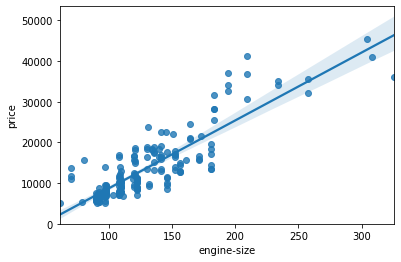

In [44]:
sns.regplot(x="engine-size",y="price",data=df)
plt.ylim(0,)

In [46]:
# Correlation between engine size and price
df[["engine-size","price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


(0.0, 47714.48753551855)

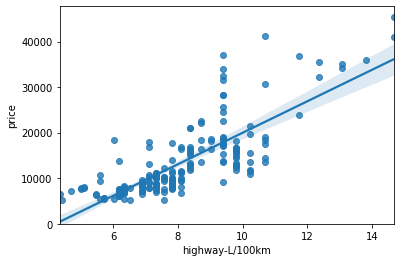

In [57]:
# Let's check "highway-L/100km" and see whether it is a promising predictor of price
df["highway-L/100km"].dtype
df[["highway-L/100km","price"]].corr() # Yes! Potential Predictor!
sns.regplot(x="highway-L/100km",y="price",data=df)
plt.ylim(0,)

(0.0, 47414.1)

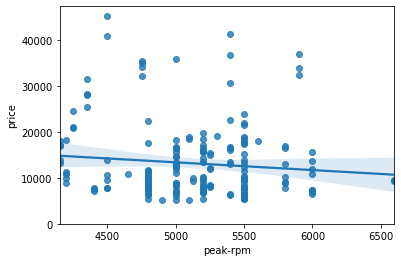

In [59]:
# In the same way, let's check peak-rpm

df[["peak-rpm","price"]].corr()
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)
# The reg-line is close to the horizontal, so weak correlation between the variables.

In [61]:
# Find the correlation between x="stroke", y="price".

df[["stroke","price"]].corr() #weak correlation

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


(0.0, 47414.1)

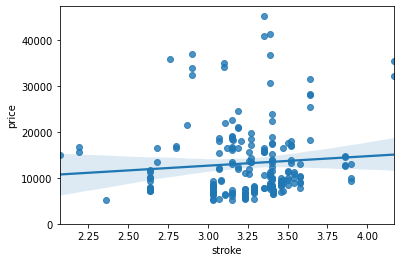

In [62]:
# Given the correlation results between "price" and "stroke" do you expect a linear relationship? Verify your results using the function "regplot()".

sns.regplot(x="stroke",y="price",data=df)
plt.ylim(0,)    # No!!! Not expecting a linear relationship!

<AxesSubplot:xlabel='engine-location', ylabel='price'>

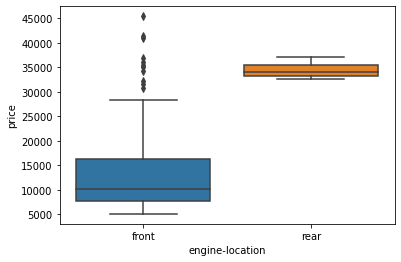

In [64]:
# Correlation between categorical and discrete variables is visualized not using scatterplots but using boxplots.df
# Find the correlation between:
# 1. body-style VS price | 2. drive-wheels VS price | 3. engine-location VS price

sns.boxplot(x="engine-location",y="price",data=df)

<AxesSubplot:xlabel='body-style', ylabel='price'>

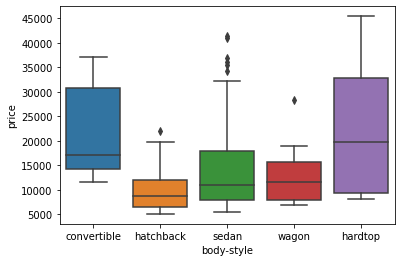

In [65]:
sns.boxplot(x="body-style",y="price",data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

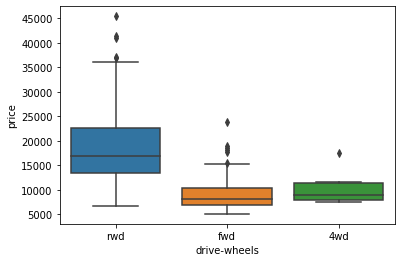

In [66]:
sns.boxplot(x="drive-wheels",y="price",data=df)

In [69]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


# Descriptive Statistics

In [70]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


In [73]:
df.describe(include='all')

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201,201,201,201,201,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,low,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,115,94,118,198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,153,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,...,5117.665368,25.179104,8.044957,13207.129353,9.944145,NaN,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,...,478.113805,6.423220,1.840739,7947.066342,2.534599,NaN,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,...,4150.000000,13.000000,4.351852,5118.000000,4.795918,NaN,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,...,4800.000000,19.000000,6.911765,7775.000000,7.833333,NaN,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,...,5125.369458,24.000000,7.833333,10295.000000,9.791667,NaN,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,...,5500.000000,30.000000,9.400000,16500.000000,12.368421,NaN,0.000000,1.000000,1.000000,0.000000


In [74]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [76]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [77]:
df["drive-wheels"].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [88]:
# save the above to a dataframe and then rename the column

drive_wheels_count = df["drive-wheels"].value_counts().to_frame()
drive_wheels_count.rename(columns={"drive-wheels":"drive_wheels_count"},inplace=True)
drive_wheels_count

# renaming the index to drive_wheels

drive_wheels_count.index.name = 'drive-wheels'
drive_wheels_count

,drive_wheels_count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [90]:
# Make such a dataframe for the variable "engine-location"

engine_location_count = df["engine-location"].value_counts().to_frame()
engine_location_count.rename(columns={"engine-location":"engine-location-count"},inplace=True)
engine_location_count.index.name = 'engine-location'
engine_location_count

,engine-location-count
engine-location,
front,198
rear,3


### Engine-Location would not be a good predictor of price because only 3 items in one category and 198 in the other, so technically, a skewed distribution.

In [93]:
df["drive-wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

## GroupBy and pivoting

In [94]:
group_1 = df[["drive-wheels","body-style","price"]]
group_1 = group_1.groupby(["drive-wheels"],as_index=False).mean()
group_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [95]:
# Similarly
group_1 = df[["drive-wheels","body-style","price"]]
group_1 = group_1.groupby(["drive-wheels", "body-style"],as_index=False).mean()
group_1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [98]:
# pivot
df_pivot = group_1.pivot(index="drive-wheels",columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [99]:
# fill the missing values with 0
df_pivot = df_pivot.fillna(0)
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [103]:
# Use the "groupby" function to find the average "price" of each car based on "body-style".

group_2 = df[["body-style","price"]]
group_2 = group_2.groupby("body-style",as_index=False).mean()
group_2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


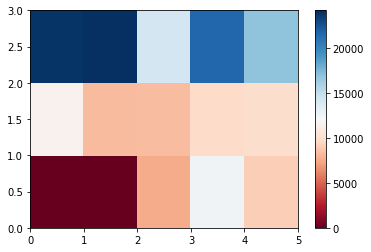

In [106]:
# plotting
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

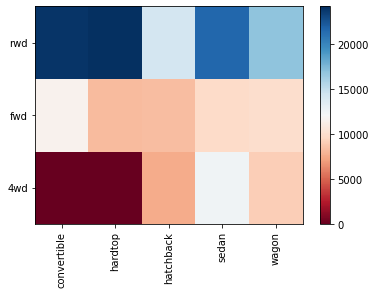

In [107]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation

In [108]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233


In [111]:
from scipy import stats

In [113]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is:",pearson_coef,",", "with a p-value of:",p_value)
# statistically significant but not extremely strong

The Pearson Correlation Coefficient is: 0.584641822265508 , with a p-value of: 8.076488270733218e-20


In [115]:
pearson_coef,p_value=stats.pearsonr(df["horsepower"],df["price"])
pearson_coef,p_value
# statistically significant!

(0.8096068016571054, 6.273536270650504e-48)

In [116]:
pearson_coef,p_value=stats.pearsonr(df["length"],df["price"])
pearson_coef,p_value
# moderately strong

(0.6906283804483639, 8.016477466159328e-30)

In [117]:
# Do the above for all the variables!

# ANNOVA

In [129]:
grouped_test2=group_1[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,4wd,7603.000000
1,4wd,12647.333333
3,fwd,11595.000000
4,fwd,8249.000000
8,rwd,23949.600000
9,rwd,24202.714286


In [130]:
grouped_test2.get_group('4wd')['price']

0     7603.000000
1    12647.333333
2     9095.750000
Name: price, dtype: float64

In [131]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 17.54495590883977 , P = 0.0005365411925421271


In [132]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 26.75473847377244 , P = 0.0008505298615827271


In [133]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 13.603994177561603 , P = 0.010228629764546682


In [134]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.015958539708919313 , P = 0.9035999352040226


# Model Development

In [137]:
# Renew the dataset + headers and retrieve in original form
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [138]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [140]:
X = df[["highway-mpg"]]
Y = df["price"]
lm.fit(X,Y)

LinearRegression()

In [141]:
Yhat = lm.predict (X)

In [143]:
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [144]:
# What is the value of the intercept?


lm.intercept_

38423.3058581574

In [145]:
# What is the value of the coefficient?

lm.coef_

array([-821.73337832])

In [146]:
# What is the final estimated linear model we get?

# price = 38423.31 - 821.73 x highway-mpg

In [147]:
# Create a linear regression object.

lm1 = LinearRegression()
lm1

LinearRegression()

In [149]:
# Train the model using 'engine-size' as the independent variable and 'price' as the dependent variable.

lm1.fit(df[["engine-size"]],df[["price"]])
lm1

LinearRegression()

In [150]:
# Find the slope and intercept of the model.

lm1.intercept_

array([-7963.33890628])

In [151]:
lm1.coef_

array([[166.86001569]])

In [152]:
# Price = 166.86*engine-size - 7963.339

In [153]:
# Multiple Linear Regression

Z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]
Y = df["price"]
lm.fit(Z,Y)

LinearRegression()

In [154]:
lm.intercept_

-15806.62462632923

In [155]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [156]:
# equation:

# Price = 53.496*horsepower + 4.708*curb-weight + 81.53*engine-size + 36.057*highway-mpg - 15806.625

In [157]:
# Create and train a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and 'highway-mpg'.

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses',"highway-mpg"]],df["price"])
lm2

LinearRegression()

In [158]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [159]:
lm2.intercept_

38201.31327245727

In [160]:
# price = 1.498*normalized-losses - 820.454*highway-mpg + 38201.3133

# Model Evaluation

## Using Regplot

(0.0, 48162.62158329374)

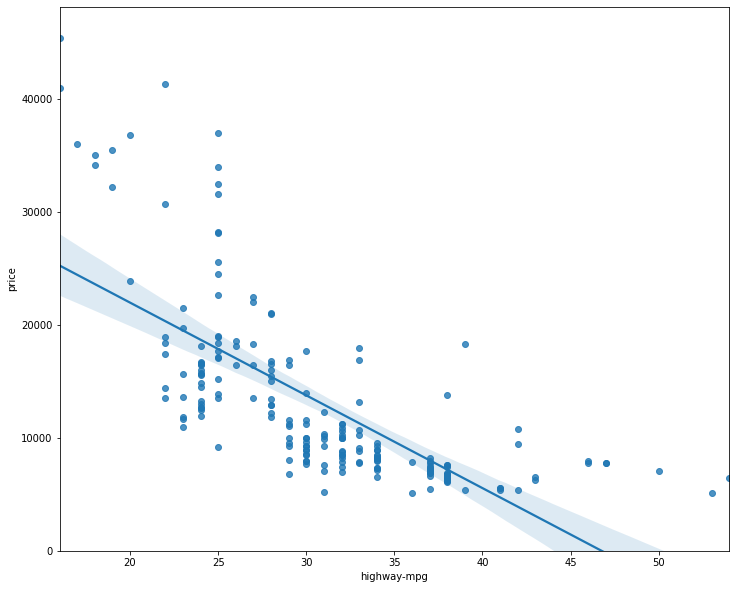

In [161]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [162]:
# We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

(0.0, 47414.1)

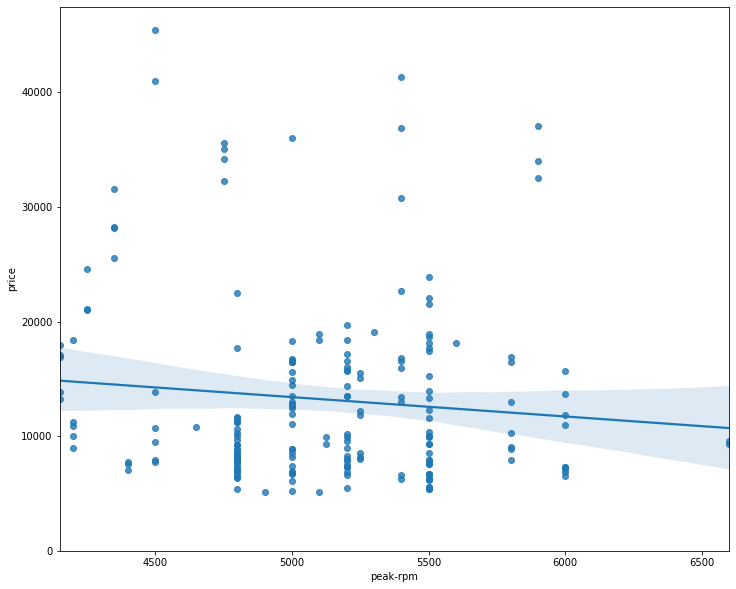

In [163]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [164]:
# Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

In [166]:
# Verifying the answers using .corr() method
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


## Using Residplot

C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


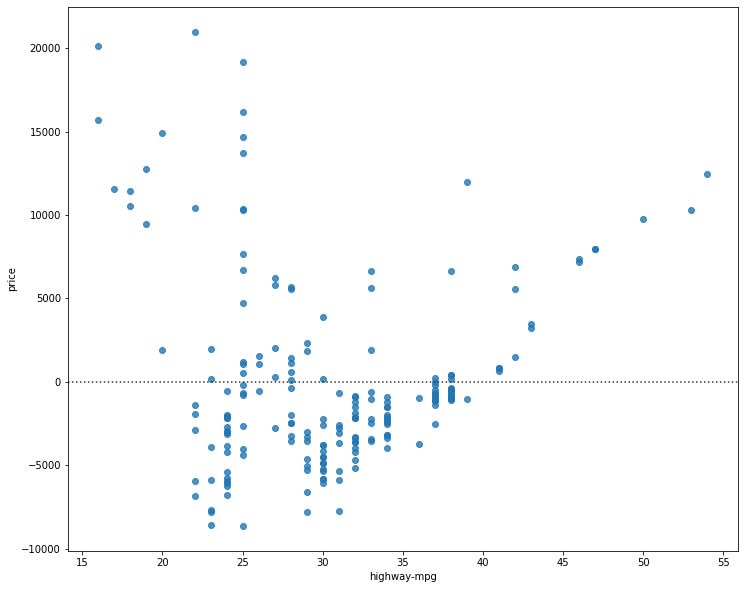

In [169]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [170]:
# We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Marconi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


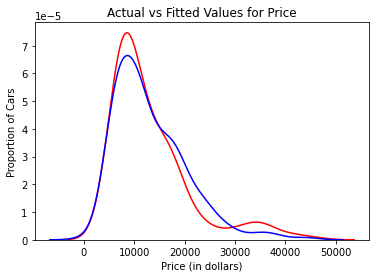

In [171]:
# Regplots and Residplots are for Linear Regression Models. For Multiple LR Models, we use distplots.

Y_hat = lm.predict(Z)
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [172]:
# Actual values and predicted values are very close, as illustrated by this model. However, since we may require more accuracy, we must try and fit a ploynomial model of a higher order.


In [173]:
# Step1: Defining a function
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [174]:
# Step2: Get the variables (we'll take highway-mpg as LR model did not yield good results)
x = df["highway-mpg"]
y = df["price"]

In [175]:
# Step4: Use the "polyfit" and "poly1d" functions
f = np.polyfit(x, y, 3) # trying to fit a 3rd degree polynomial
p = np.poly1d(f)
p

poly1d([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

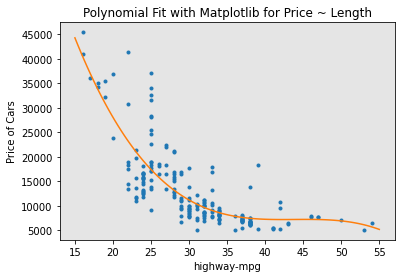

In [176]:
PlotPolly(p,x,y,'highway-mpg')

In [177]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [178]:
# We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

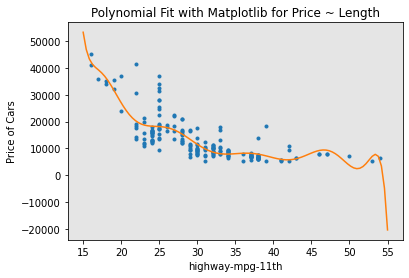

In [181]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
p1
PlotPolly(p1,x,y,"highway-mpg-11th")

In [182]:
# Doesn't fit well, so for now, we'll proceed with the cubic polynomial fit as shownn previously.


## Using Polynomial Transforms

In [183]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [184]:
Z_pr=pr.fit_transform(Z)

In [185]:
Z.shape # 201 datapoints and 4 features before transform

(201, 4)

In [186]:
Z_pr.shape # 201 datapoints and 15 features after transform (features are the number of terms in the overall regression equation, which tends to get complicated and complexed in the case of Multivariate Polynomial Transform)

(201, 15)

## Using Pipelines

In [188]:
# Step1: Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [189]:
# Step2: Normalization
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [190]:
# Step3: Perform the Prediction

ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [193]:
# Create a Pipeline using the variables stored in "Z".

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

pipe = Pipeline(input)

pipe.fit(Z,y)

yhat = pipe.predict(Z)

yhat[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

## Using In-Sample Evaluation Methods

### R-Squared

In [196]:
X = df[["highway-mpg"]]
Y = df["price"]
lm.fit(X,Y)

LinearRegression()

In [199]:
lm.score(X,Y)

0.4965911884339176

### Mean Squared Error

In [201]:
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [205]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
mse

31635042.944639888

In [206]:
# The above scores of R-Squared and MSE are for the first model. We may do the same for every model that we've developed in this notebook.

In [207]:
# MODEL 2

In [208]:
lm.fit(Z,df["price"])

LinearRegression()

In [210]:
lm.score(Z,df["price"])

0.8093562806577457

In [211]:
Yhat = lm.predict(Z)

In [212]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], Yhat)
mse

11980366.87072649

In [213]:
# MODEL 3 (POLYNOMIAL MODEL)

In [214]:
from sklearn.metrics import r2_score   # Since we're using a different function, we'll need this
r_squared = r2_score(y, p(x))
r_squared


0.674194666390652

In [215]:
mean_squared_error(df['price'], p(x))

20474146.426361218

In [216]:
# Comparing these three models using the R-squared values (highest R-squared + lowest MSE), we conclude that the MLR (MODEL 2) model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.